In [41]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [43]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Verify shapes
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (8000, 7)
Test Data Shape: (2000, 6)


In [44]:
print("Training Dataset: \n")
display(train_data.head())
print('\n')
print("Test Dataset: \n")
display(test_data.head())

Training Dataset: 



SongLength  NumInstruments      Genre       Tempo  LyricalContent  \
0  234.369261               4  Classical   84.774424        0.152603   
1  343.876324               6       Jazz   65.486515        0.408796   
2  305.973959               1       Jazz  164.752829        0.318433   
3  158.897558               4        Pop  186.565004        0.680595   
4  294.279271               4    Country  140.615871        0.969931   

   ReleasedYear  Popularity  
0          2009   13.636534  
1          1980   42.910689  
2          1981   48.790880  
3          1984   68.362001  
4          2015   86.969489



Test Dataset: 



SongLength  NumInstruments      Genre       Tempo  LyricalContent  \
0  387.678577               4  Classical  113.634583        0.798992   
1  189.004660               3        Rap  155.625985        0.345585   
2  188.998630               9       Jazz  155.238167        0.671574   
3  327.018144               4  Classical  148.989615        0.259165   
4  392.477463               6        Pop  151.682743        0.203725   

   ReleasedYear  
0          2006  
1          1982  
2          1981  
3          2008  
4          2004

In [45]:
print("Training Dataset Information: \n")
train_info = train_data.info()
display(train_info)
print('\n')

print("Test Dataset Information: \n")
test_info = test_data.info()
display(test_info)

Training Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


None



Test Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      2000 non-null   float64
 1   NumInstruments  2000 non-null   int64  
 2   Genre           2000 non-null   object 
 3   Tempo           2000 non-null   float64
 4   LyricalContent  2000 non-null   float64
 5   ReleasedYear    2000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 93.9+ KB


None

In [46]:
print("Training Dataset Statistical Summary: \n")
display(train_data.describe().T)
print('\n')

print("Test Dataset Statistical Summary: \n")
display(test_data.describe().T)

Training Dataset Statistical Summary: 



count         mean        std          min          25%  \
SongLength      8000.0   273.589503  71.708680   150.002909   212.088516   
NumInstruments  8000.0     4.940125   2.585754     1.000000     3.000000   
Tempo           8000.0   129.077731  39.988642    60.013660    94.237178   
LyricalContent  8000.0     0.499154   0.289179     0.000017     0.250352   
ReleasedYear    8000.0  2001.003625  12.356535  1980.000000  1990.000000   
Popularity      8000.0    49.334637  21.296583     0.000000    33.075306   

                        50%          75%          max  
SongLength       273.014753   335.088452   399.929418  
NumInstruments     5.000000     7.000000     9.000000  
Tempo            129.673045   162.812788   199.970512  
LyricalContent     0.495696     0.751058     0.999972  
ReleasedYear    2001.000000  2012.000000  2022.000000  
Popularity        49.286768    65.515098   100.000000



Test Dataset Statistical Summary: 



count         mean        std          min          25%  \
SongLength      2000.0   273.341433  72.715244   150.033673   209.354794   
NumInstruments  2000.0     5.051000   2.575794     1.000000     3.000000   
Tempo           2000.0   130.637948  40.899189    60.000775    94.832392   
LyricalContent  2000.0     0.495397   0.291668     0.000613     0.243012   
ReleasedYear    2000.0  2001.471000  12.219526  1980.000000  1991.000000   

                        50%          75%          max  
SongLength       273.754843   334.915478   399.837575  
NumInstruments     5.000000     7.000000     9.000000  
Tempo            129.582562   167.133491   199.879191  
LyricalContent     0.492893     0.755646     0.999891  
ReleasedYear    2002.000000  2012.000000  2022.000000

In [47]:
print('--- Missing Values in Train ---\n')
train_missing = train_data.isnull().sum()
print(train_missing)
print('\n')

print('--- Missing Values in Test ---\n')
test_missing = test_data.isnull().sum()
print(test_missing)


--- Missing Values in Train ---

SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64


--- Missing Values in Test ---

SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
dtype: int64


In [48]:
train_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows in the training dataset: {train_duplicates}")

test_duplicates = test_data.duplicated().sum()
print(f"Number of duplicate rows in the test dataset: {test_duplicates}")

Number of duplicate rows in the training dataset: 0
Number of duplicate rows in the test dataset: 0


In [49]:
print("Unique values in training dataset:")
train_unique_counts = train_data.nunique()
print(train_unique_counts)

print("\nUnique values in test dataset:")
test_unique_counts = test_data.nunique()
print(test_unique_counts)


Unique values in training dataset:
SongLength        8000
NumInstruments       9
Genre                6
Tempo             8000
LyricalContent    8000
ReleasedYear        43
Popularity        7967
dtype: int64

Unique values in test dataset:
SongLength        2000
NumInstruments       9
Genre                6
Tempo             2000
LyricalContent    2000
ReleasedYear        43
dtype: int64


In [50]:
numerical_train = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_train = train_data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

numerical_test = test_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_test = test_data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the training dataset:")
print(numerical_train)

print("\nNon-numerical columns in the training dataset:")
print(non_numerical_train)

print("\nNumerical columns in the test dataset:")
print(numerical_test)

print("\nNon-numerical columns in the test dataset:")
print(non_numerical_test)


Numerical columns in the training dataset:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity']

Non-numerical columns in the training dataset:
['Genre']

Numerical columns in the test dataset:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']

Non-numerical columns in the test dataset:
['Genre']


In [51]:
print("\nUnique values count for each categorical column in the training dataset:")
for column in non_numerical_train:
    print(f"{column}: {train_data[column].nunique()}")

print("\nUnique values count for each categorical column in the test dataset:")
for column in non_numerical_test:
    print(f"{column}: {test_data[column].nunique()}")


Unique values count for each categorical column in the training dataset:
Genre: 6

Unique values count for each categorical column in the test dataset:
Genre: 6


In [52]:
print("\nUnique values for each categorical column in the training dataset:")
for col in non_numerical_train:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {train_data[col].unique()}")

print("\nUnique values for each categorical column in the test dataset:")

for col in non_numerical_test:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {train_data[col].unique()}")


Unique values for each categorical column in the training dataset:

Column: Genre
Unique Values: ['Classical' 'Jazz' 'Pop' 'Country' 'Rap' 'Rock']

Unique values for each categorical column in the test dataset:

Column: Genre
Unique Values: ['Classical' 'Jazz' 'Pop' 'Country' 'Rap' 'Rock']


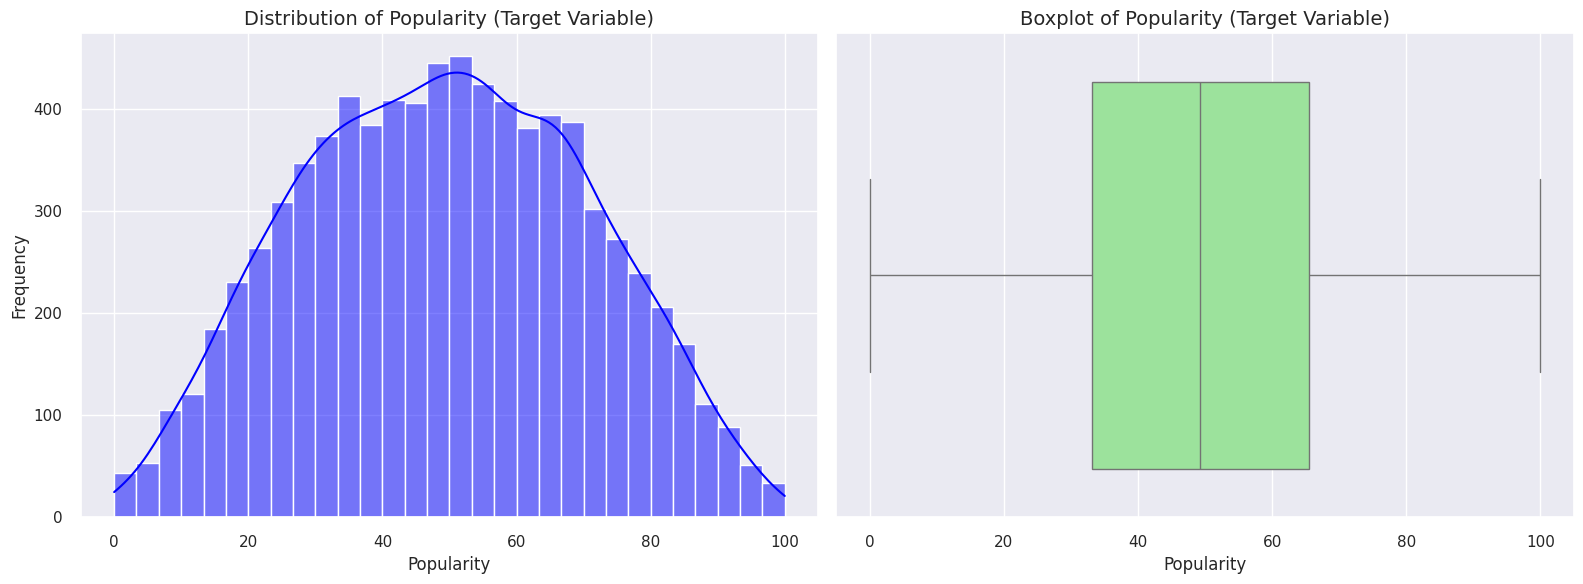

In [56]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['Popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Popularity (Target Variable)', fontsize=14)
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['Popularity'], color='lightgreen')
plt.title('Boxplot of Popularity (Target Variable)', fontsize=14)
plt.xlabel('Popularity')

plt.tight_layout()
plt.show()

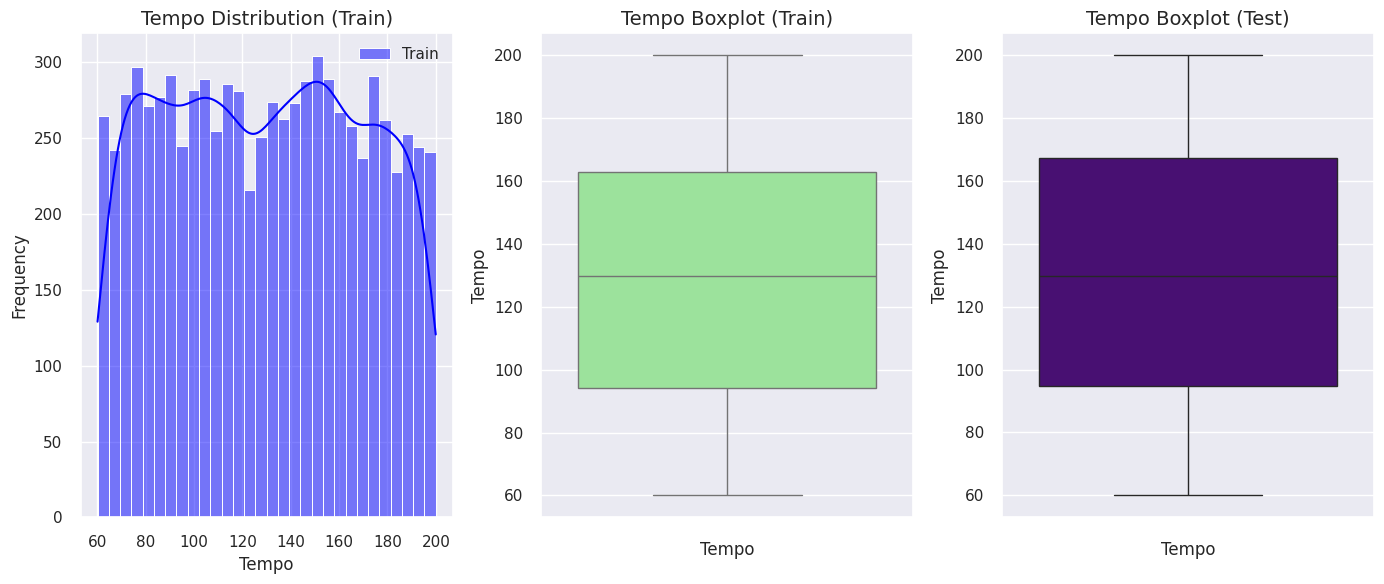

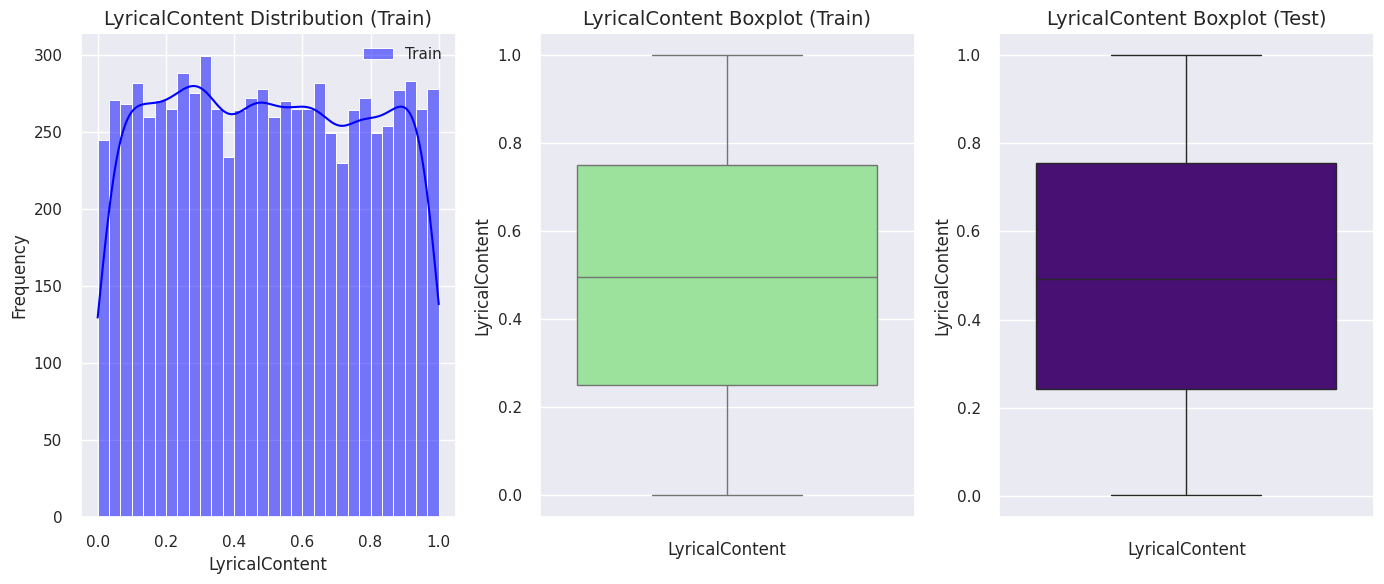

In [59]:
def visualize_distributions_and_boxplots(df_train, df_test, numerical_features):
    for feature in numerical_features:
        # Distribution plot for the feature in training and test datasets
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 3, 1)
        sns.histplot(df_train[feature], bins=30, kde=True, color='blue', label='Train')
        plt.title(f'{feature} Distribution (Train)', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend()

        plt.subplot(1, 3, 2)
        sns.boxplot(y=df_train[feature], color='lightgreen')
        plt.title(f'{feature} Boxplot (Train)', fontsize=14)
        plt.xlabel(feature)

        plt.subplot(1, 3, 3)
        sns.boxplot(y=df_test[feature], color='indigo')
        plt.title(f'{feature} Boxplot (Test)', fontsize=14)
        plt.xlabel(feature)

        plt.tight_layout()
        plt.show()

numerical_features = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']

visualize_distributions_and_boxplots(train_data, test_data, numerical_features)

In [60]:
column_name = 'Genre'
plt.figure(figsize=(10, 4))

num_genres = train_data[column_name].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=train_data, palette=prgn_palette)
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for Genre percentage distribution
plt.subplot(1, 2, 2)
train_data[column_name].value_counts().plot.pie(autopct='%1.1f%%',
                                                  colors=prgn_palette,
                                                  startangle=90,
                                                  explode=[0.05]*num_genres)
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')
plt.tight_layout()
plt.show()


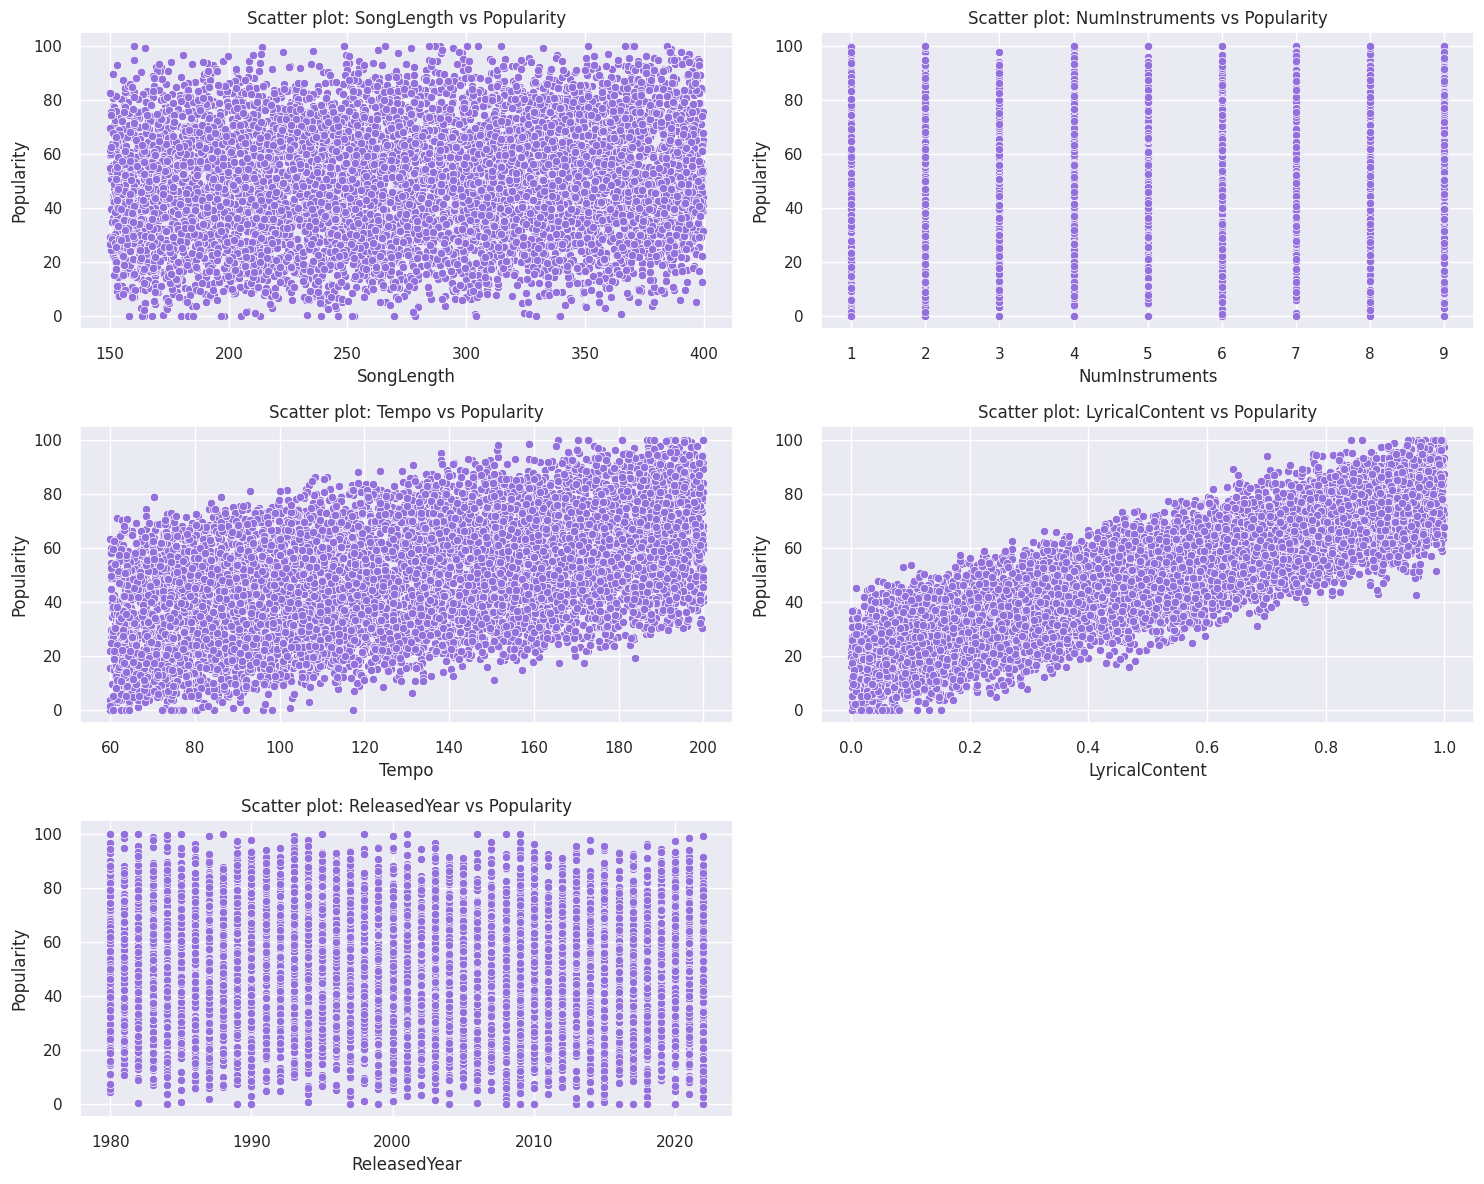

In [61]:
numerical_features = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']

# Scatter plots between numerical features and Popularity
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=train_data, x=feature, y='Popularity', color='mediumpurple')
    plt.title(f'Scatter plot: {feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [62]:
numerical_features_train = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity']
numerical_features_test = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']

train_subset = train_data[numerical_features_train]
test_subset = test_data[numerical_features_test]

train_corr = train_subset.corr()

test_corr = test_subset.corr()

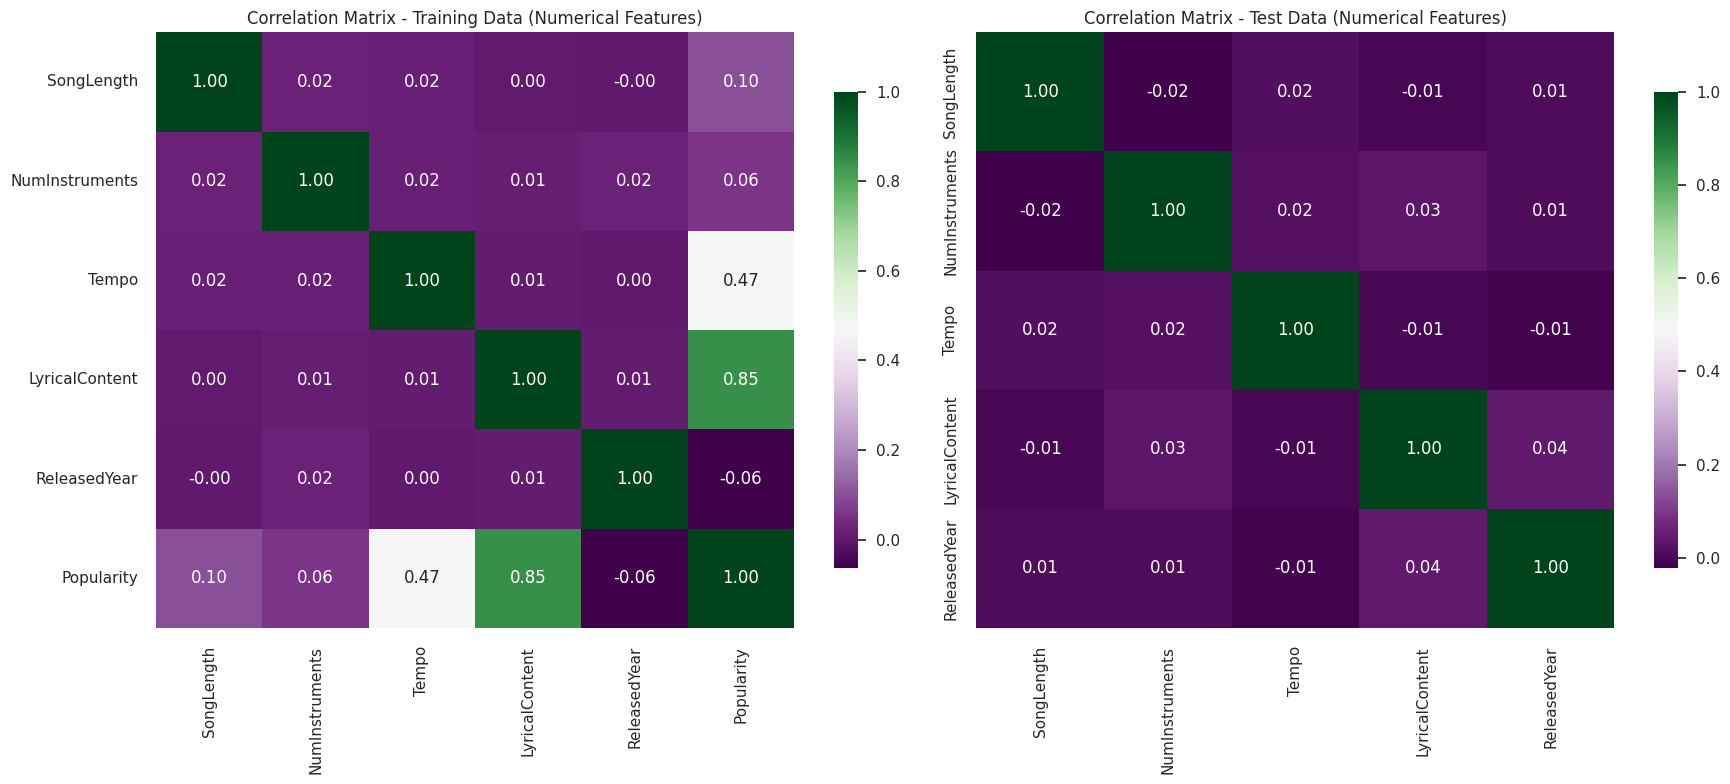

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

prgn_palette = sns.color_palette("PRGn", as_cmap=True)

# Plotting the correlation heatmap for the training data
sns.heatmap(train_corr, annot=True, cmap=prgn_palette, fmt=".2f", ax=axes[0], cbar_kws={'shrink': .8})
axes[0].set_title("Correlation Matrix - Training Data (Numerical Features)")

# Plotting the correlation heatmap for the test data
sns.heatmap(test_corr, annot=True, cmap=prgn_palette, fmt=".2f", ax=axes[1], cbar_kws={'shrink': .8})
axes[1].set_title("Correlation Matrix - Test Data (Numerical Features)")

plt.tight_layout()
plt.show()

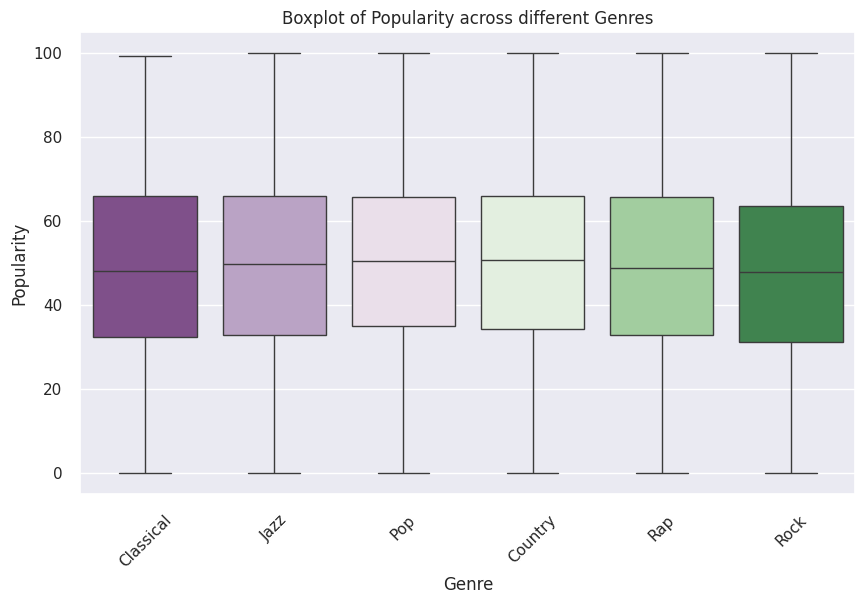

In [64]:
num_genres = train_data['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

# Boxplot of Popularity across different Genre categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Genre', y='Popularity', palette=prgn_palette)
plt.title('Boxplot of Popularity across different Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

In [65]:
genre_grouped = train_data.groupby('Genre').mean()
genre_grouped_numerical = genre_grouped[['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'Popularity']]

print("Average values of numerical features grouped by Genre:")
genre_grouped_styled = genre_grouped_numerical.style.background_gradient(cmap='PRGn')
display(genre_grouped_styled)

Average values of numerical features grouped by Genre:


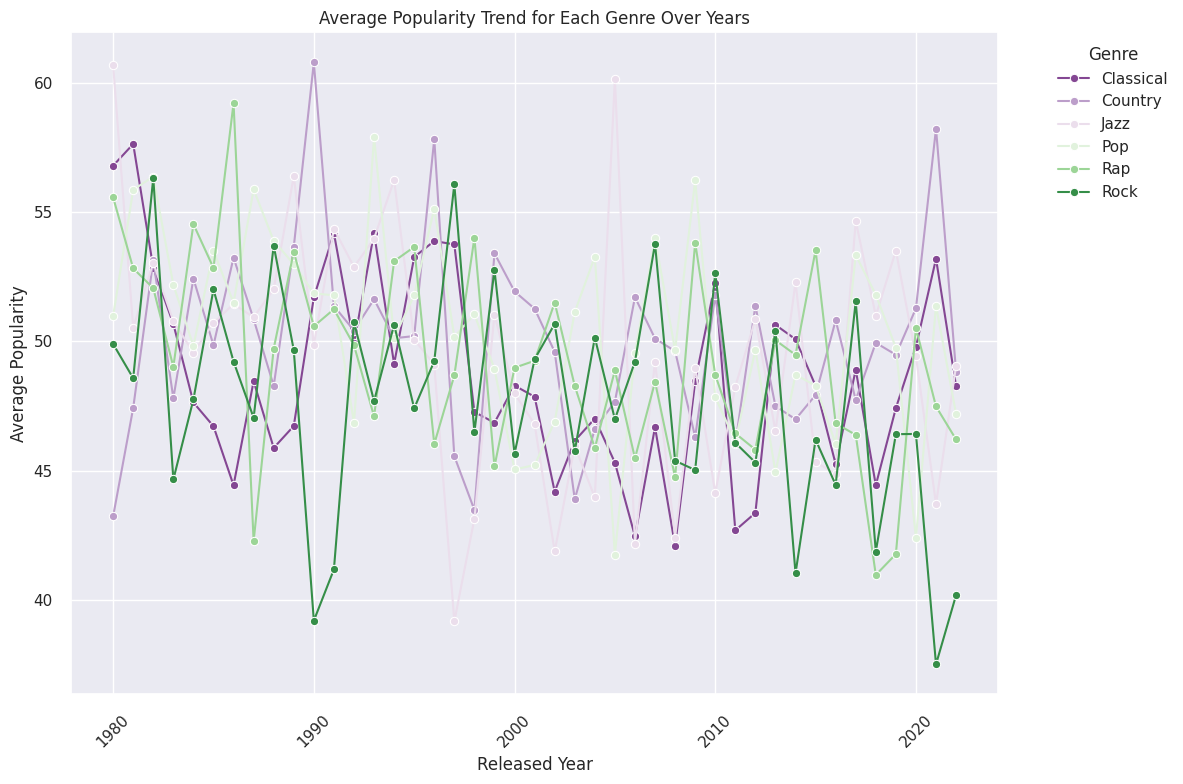

In [66]:
genre_popularity_trend = train_data.groupby(['ReleasedYear', 'Genre'])['Popularity'].mean().reset_index()

num_genres = genre_popularity_trend['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

# Line plot showing average popularity trend for each genre over years
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_popularity_trend, x='ReleasedYear', y='Popularity', hue='Genre',
             marker='o', palette=prgn_palette)
plt.title('Average Popularity Trend for Each Genre Over Years')
plt.xlabel('Released Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

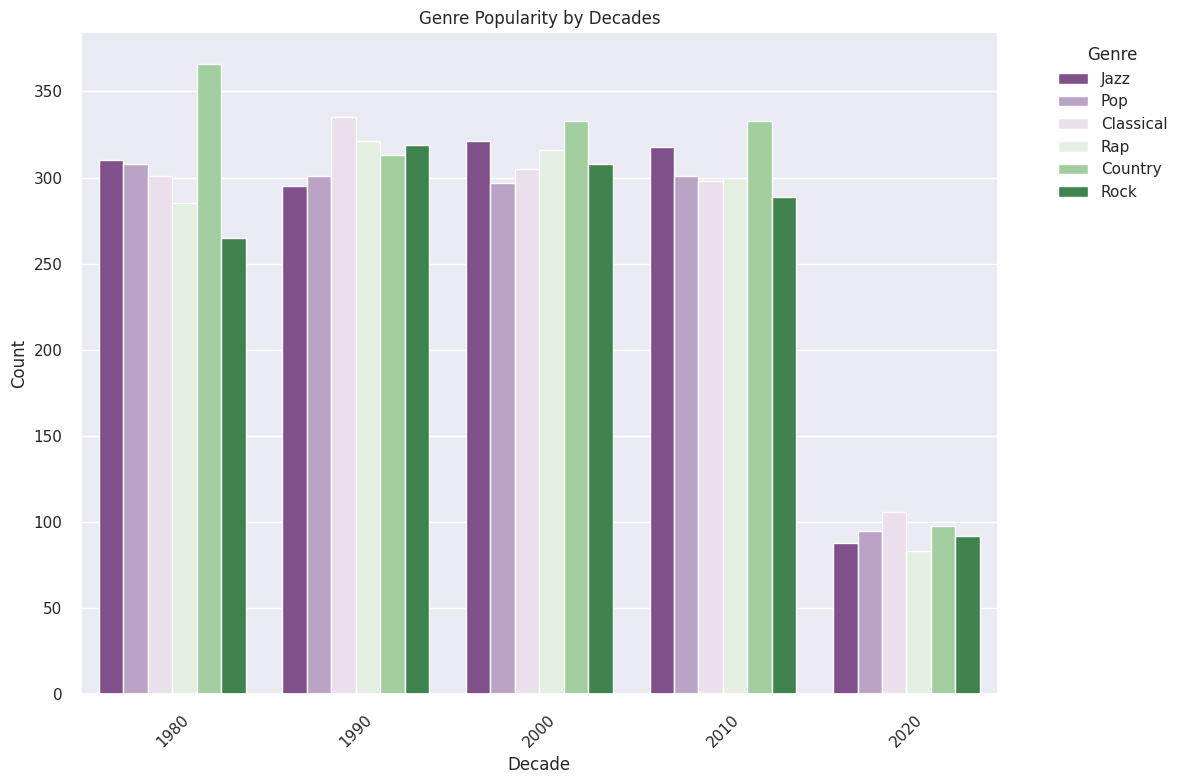

In [68]:

train_data['Decade'] = (train_data['ReleasedYear'] // 10) * 10
test_data['Decade'] = (test_data['ReleasedYear'] // 10) * 10

num_genres = train_data['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='Decade', hue='Genre', palette=prgn_palette)
plt.title('Genre Popularity by Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

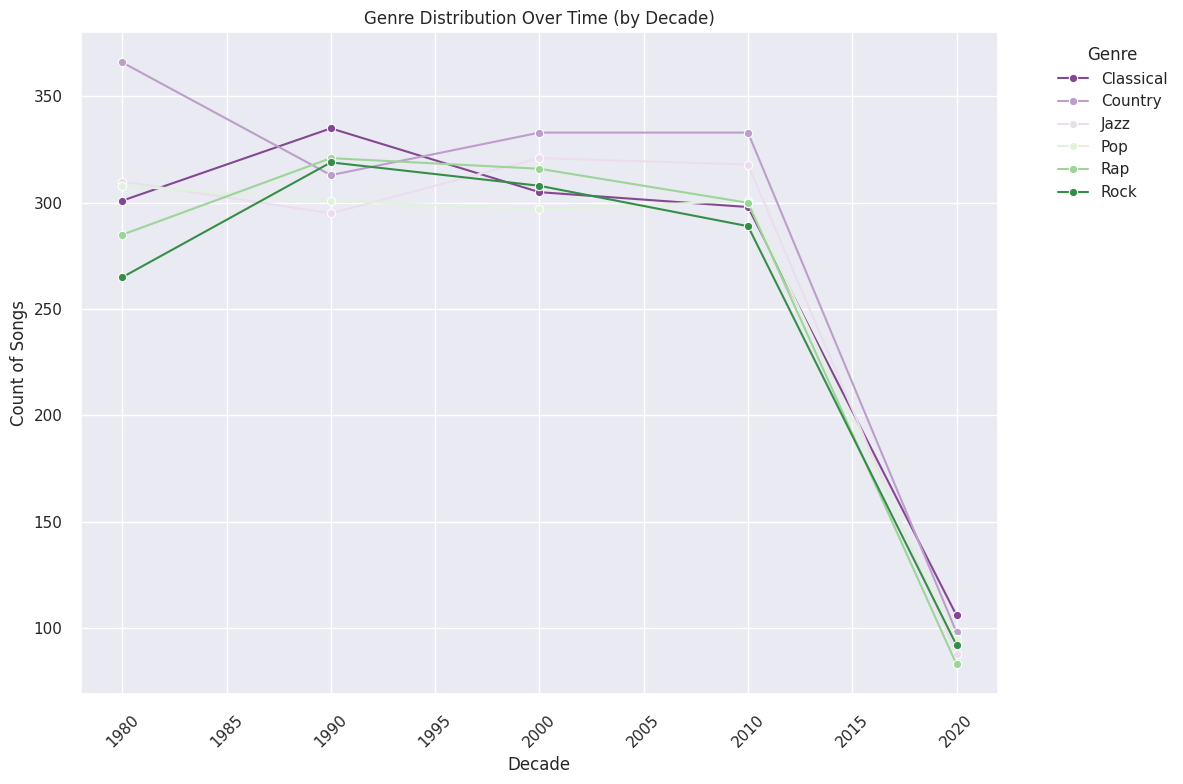

In [69]:
genre_trend = train_data.groupby(['Decade', 'Genre']).size().reset_index(name='Count')

num_genres = genre_trend['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trend, x='Decade', y='Count', hue='Genre',
             marker='o', palette=prgn_palette)
plt.title('Genre Distribution Over Time (by Decade)')
plt.xlabel('Decade')
plt.ylabel('Count of Songs')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


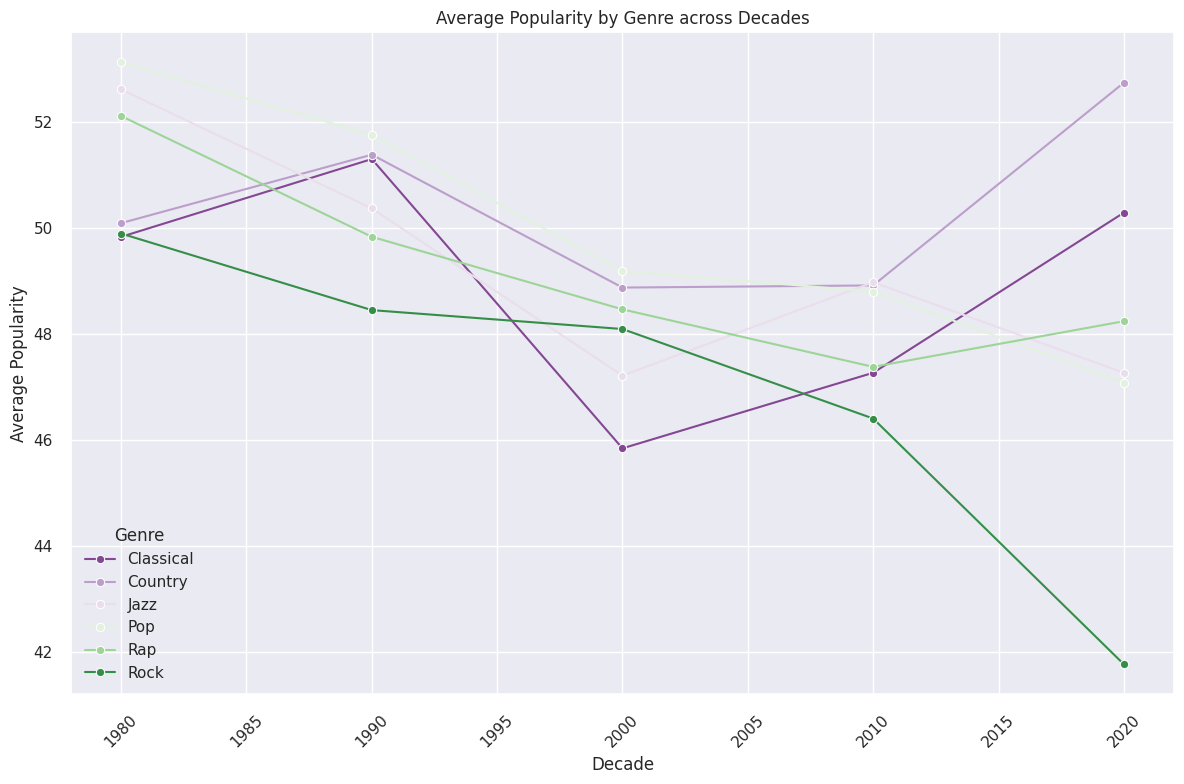

In [70]:

genre_decade_popularity = train_data.groupby(['Decade', 'Genre'])['Popularity'].mean().reset_index()

num_genres = genre_decade_popularity['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)

plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_decade_popularity, x='Decade', y='Popularity', hue='Genre',
             marker='o', palette=prgn_palette)
plt.title('Average Popularity by Genre across Decades')
plt.xlabel('Decade')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

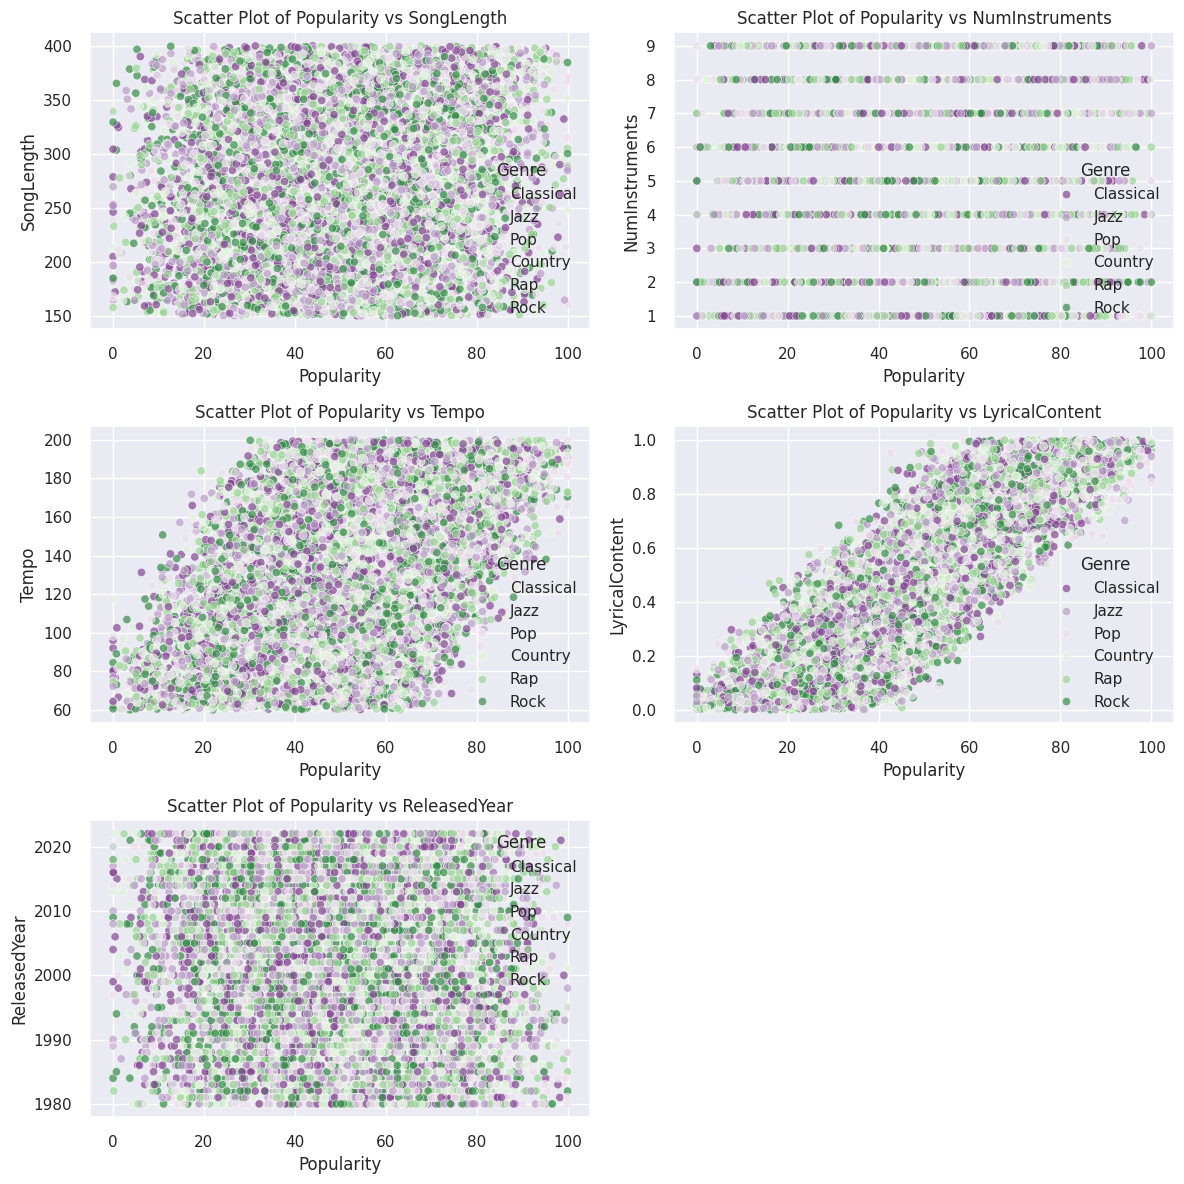

In [72]:
columns_to_analyze = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear']

num_genres = train_data['Genre'].nunique()
prgn_palette = sns.color_palette("PRGn", num_genres)


plt.figure(figsize=(12, 12))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=train_data, x='Popularity', y=column, hue='Genre', palette=prgn_palette, alpha=0.7)
    plt.title(f'Scatter Plot of Popularity vs {column}')
    plt.xlabel('Popularity')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [73]:
numerical_features = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity']

print(f"{'Feature':<20} {'Skewness':<10} {'Kurtosis':<10}")
print("-" * 40)

for feature in numerical_features:
    skewness = train_data[feature].skew()
    kurtosis = train_data[feature].kurtosis()

    print(f"{feature:<20} {skewness:<10.2f} {kurtosis:<10.2f}")

Feature              Skewness   Kurtosis  
----------------------------------------
SongLength           0.03       -1.18     
NumInstruments       0.02       -1.24     
Tempo                0.02       -1.19     
LyricalContent       0.02       -1.20     
ReleasedYear         -0.00      -1.19     
Popularity           0.02       -0.72     


In [74]:
def categorize_tempo(tempo):
    if tempo < 76:
        return 'Slow'
    elif 76 <= tempo < 120:
        return 'Moderate'
    else:
        return 'Fast'

train_data['TempoCategory'] = train_data['Tempo'].apply(categorize_tempo)
test_data['TempoCategory'] = test_data['Tempo'].apply(categorize_tempo)

In [75]:
print("Unique values and counts for 'TempoCategory' in the training dataset:")
tempo_counts_train = train_data['TempoCategory'].value_counts()
print(tempo_counts_train)

print("\n")


print("Unique values and counts for 'TempoCategory' in the test dataset:")
tempo_counts_test = test_data['TempoCategory'].value_counts()
print(tempo_counts_test)

Unique values and counts for 'TempoCategory' in the training dataset:
TempoCategory
Fast        4473
Moderate    2603
Slow         924
Name: count, dtype: int64


Unique values and counts for 'TempoCategory' in the test dataset:
TempoCategory
Fast        1147
Moderate     621
Slow         232
Name: count, dtype: int64


In [76]:
purple_palette = sns.color_palette("Purples", n_colors=train_data['TempoCategory'].nunique())


plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='TempoCategory', y='Popularity', palette=purple_palette)
plt.title('Popularity Trends by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

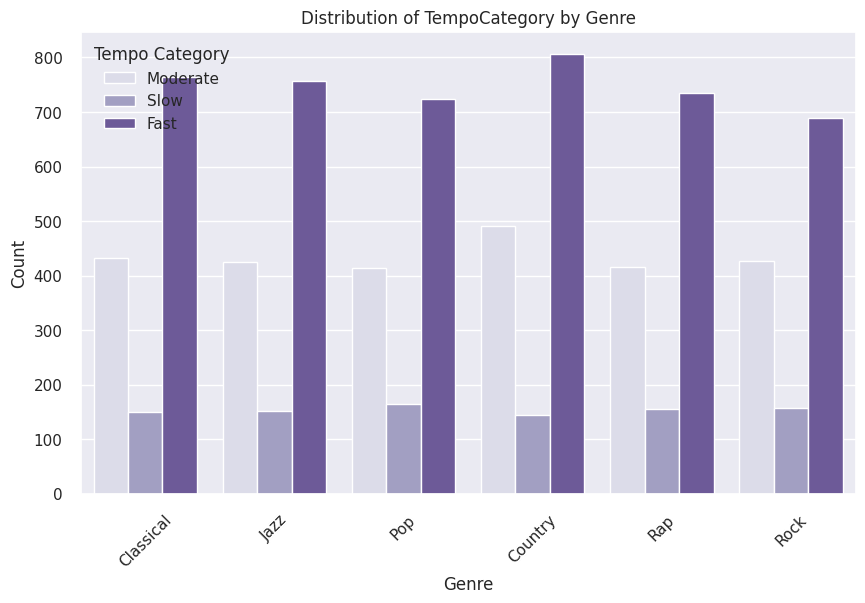

In [77]:
num_tempo_categories = train_data['TempoCategory'].nunique()
purple_palette = sns.color_palette("Purples", num_tempo_categories)

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Genre', hue='TempoCategory', palette=purple_palette)
plt.title('Distribution of TempoCategory by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tempo Category')
plt.show()

In [78]:
train_data['LyricalContentCategory'] = pd.qcut(train_data['LyricalContent'], q=3, labels=['Low', 'Medium', 'High'])
test_data['LyricalContentCategory'] = pd.qcut(test_data['LyricalContent'], q=3, labels=['Low', 'Medium', 'High'])

In [79]:
print("Unique values and counts for 'LyricalContentCategory' in the training dataset:")
lyrical_content_counts_train = train_data['LyricalContentCategory'].value_counts()
print(lyrical_content_counts_train)

print("\n")

print("Unique values and counts for 'LyricalContentCategory' in the test dataset:")
lyrical_content_counts_test = test_data['LyricalContentCategory'].value_counts()
print(lyrical_content_counts_test)

Unique values and counts for 'LyricalContentCategory' in the training dataset:
LyricalContentCategory
Low       2667
High      2667
Medium    2666
Name: count, dtype: int64


Unique values and counts for 'LyricalContentCategory' in the test dataset:
LyricalContentCategory
Low       667
High      667
Medium    666
Name: count, dtype: int64


In [80]:
num_lyrical_categories = train_data['LyricalContentCategory'].nunique()
purple_palette = sns.color_palette("Purples", num_lyrical_categories)

# Plotting the distribution of LyricalContentCategory by Genre using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Genre', hue='LyricalContentCategory', palette=purple_palette)
plt.title('Distribution of LyricalContentCategory by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Lyrical Content Category')
plt.show()

In [81]:

train_data.drop(columns=['Tempo', 'LyricalContent'], inplace=True)
test_data.drop(columns=['Tempo', 'LyricalContent'], inplace=True)


print("Remaining columns in the training dataset:")
display(train_data.columns.tolist())

print("\n")


print("Remaining columns in the test dataset:")
display(test_data.columns.tolist())

Remaining columns in the training dataset:


['SongLength',
 'NumInstruments',
 'Genre',
 'ReleasedYear',
 'Popularity',
 'Decade',
 'TempoCategory',
 'LyricalContentCategory']



Remaining columns in the test dataset:


['SongLength',
 'NumInstruments',
 'Genre',
 'ReleasedYear',
 'Decade',
 'TempoCategory',
 'LyricalContentCategory']

In [82]:
encoded_train_data = pd.get_dummies(train_data, columns=['Genre', 'TempoCategory', 'LyricalContentCategory'])
encoded_test_data = pd.get_dummies(test_data, columns=['Genre', 'TempoCategory', 'LyricalContentCategory'])

# Displaying the first few rows of the encoded training data to verify
encoded_train_data.head()

SongLength  NumInstruments  ReleasedYear  Popularity  Decade  \
0  234.369261               4          2009   13.636534    2000   
1  343.876324               6          1980   42.910689    1980   
2  305.973959               1          1981   48.790880    1980   
3  158.897558               4          1984   68.362001    1980   
4  294.279271               4          2015   86.969489    2010   

   Genre_Classical  Genre_Country  Genre_Jazz  Genre_Pop  Genre_Rap  \
0             True          False       False      False      False   
1            False          False        True      False      False   
2            False          False        True      False      False   
3            False          False       False       True      False   
4            False           True       False      False      False   

   Genre_Rock  TempoCategory_Fast  TempoCategory_Moderate  TempoCategory_Slow  \
0       False               False                    True               False   
1       False               False                   False                True   
2       False                True                   False               False   
3       False                True                   False               False   
4       False                True                   False               False   

   LyricalContentCategory_Low  LyricalContentCategory_Medium  \
0                        True                          False   
1                       False                           True   
2                        True                          False   
3                       False                          False   
4                       False                          False   

   LyricalContentCategory_High  
0                        False  
1                        False  
2                        False  
3                         True  
4                         True

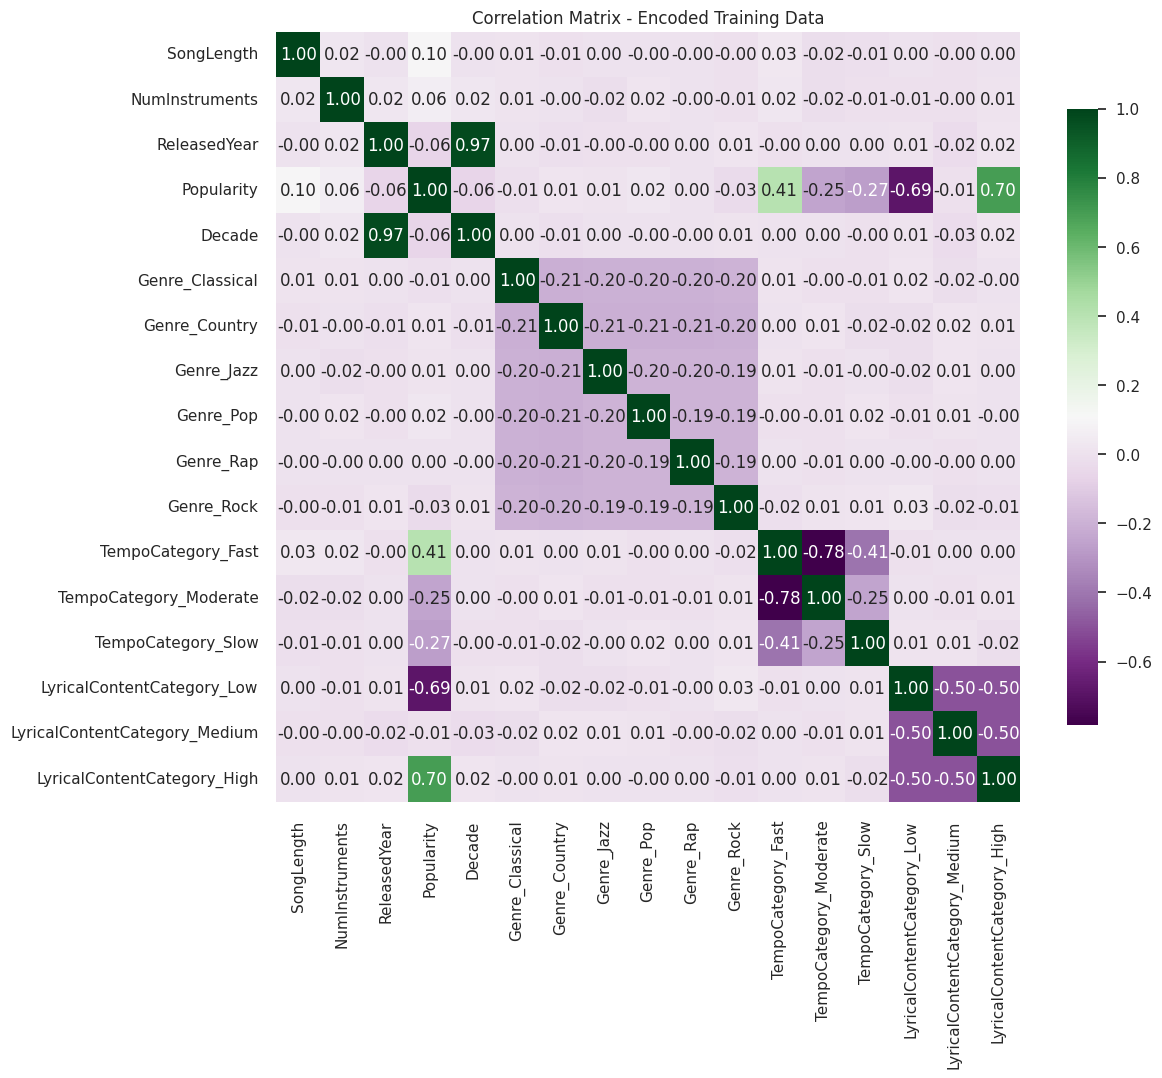

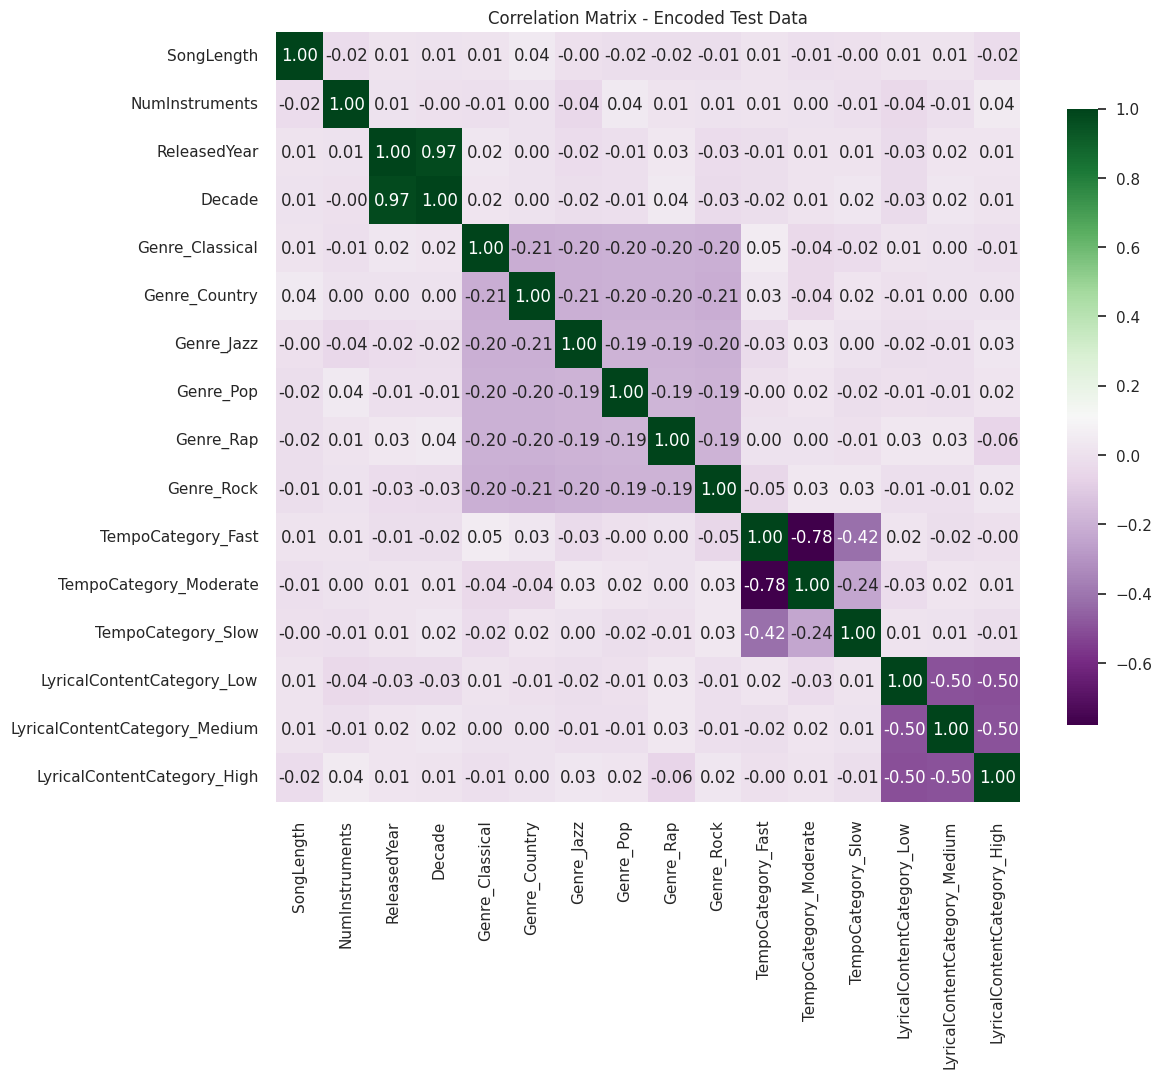

In [83]:
train_corr = encoded_train_data.corr()
test_corr = encoded_test_data.corr()


prgn_palette = sns.color_palette("PRGn", as_cmap=True)


plt.figure(figsize=(12, 10))
sns.heatmap(train_corr, annot=True, cmap=prgn_palette, fmt=".2f", cbar_kws={'shrink': .8})
plt.title("Correlation Matrix - Encoded Training Data")
plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(test_corr, annot=True, cmap=prgn_palette, fmt=".2f", cbar_kws={'shrink': .8})
plt.title("Correlation Matrix - Encoded Test Data")
plt.show()


In [84]:

encoded_train_data.drop(columns=['Decade'], inplace=True)
encoded_test_data.drop(columns=['Decade'], inplace=True)


print("Remaining columns in the encoded training dataset:")
display(encoded_train_data.columns.tolist())

print("\n")


print("Remaining columns in the encoded test dataset:")
display(encoded_test_data.columns.tolist())

Remaining columns in the encoded training dataset:


['SongLength',
 'NumInstruments',
 'ReleasedYear',
 'Popularity',
 'Genre_Classical',
 'Genre_Country',
 'Genre_Jazz',
 'Genre_Pop',
 'Genre_Rap',
 'Genre_Rock',
 'TempoCategory_Fast',
 'TempoCategory_Moderate',
 'TempoCategory_Slow',
 'LyricalContentCategory_Low',
 'LyricalContentCategory_Medium',
 'LyricalContentCategory_High']



Remaining columns in the encoded test dataset:


['SongLength',
 'NumInstruments',
 'ReleasedYear',
 'Genre_Classical',
 'Genre_Country',
 'Genre_Jazz',
 'Genre_Pop',
 'Genre_Rap',
 'Genre_Rock',
 'TempoCategory_Fast',
 'TempoCategory_Moderate',
 'TempoCategory_Slow',
 'LyricalContentCategory_Low',
 'LyricalContentCategory_Medium',
 'LyricalContentCategory_High']

In [85]:
X = encoded_train_data.drop(columns=['Popularity'])  # Features
y = encoded_train_data['Popularity']  # Target

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Training features shape: (6400, 15)
Validation features shape: (1600, 15)
Training target shape: (6400,)
Validation target shape: (1600,)


In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [88]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
    'LGBM': LGBMRegressor(verbose=-1, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

In [89]:
results = {}
best_model = None
best_r2 = -np.inf

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

    # Determine the best model based on R2 score
    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

print(f"\nBest model based on R2 score: {best_model}")

Random Forest - MSE: 87.58, R2: 0.80
XGBoost - MSE: 92.78, R2: 0.79
LGBM - MSE: 82.16, R2: 0.81
CatBoost - MSE: 83.45, R2: 0.81

Best model based on R2 score: LGBM


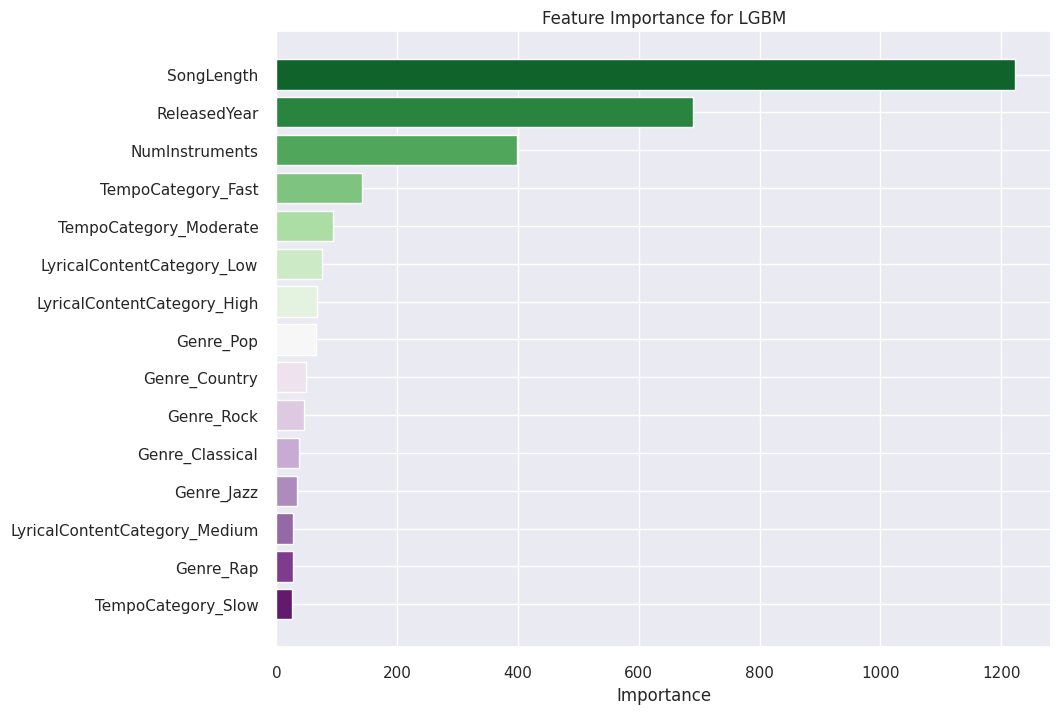

In [90]:
if best_model in ['Random Forest', 'XGBoost', 'LGBM', 'CatBoost']:
    best_model_instance = models[best_model]

    if hasattr(best_model_instance, 'feature_importances_'):
        feature_importances = best_model_instance.feature_importances_
        sorted_idx = np.argsort(feature_importances)
        feature_names = X.columns

        # Create a discrete PRGn color palette
        num_features = len(sorted_idx)
        prgn_palette = sns.color_palette("PRGn", num_features)

        plt.figure(figsize=(10, 8))
        plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=prgn_palette)
        plt.yticks(np.arange(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.title(f'Feature Importance for {best_model}')
        plt.xlabel('Importance')
        plt.show()

In [91]:
encoded_test_data_scaled = scaler.transform(encoded_test_data)

# Generating predictions for the test data
y_test_pred = models[best_model].predict(encoded_test_data_scaled)

submission = pd.DataFrame({
    'Id': encoded_test_data.index,
    'PredictedPopularity': y_test_pred
})

display(submission.head(10))

Id  PredictedPopularity
0   0            63.555795
1   1            58.490370
2   2            79.266257
3   3            34.098631
4   4            41.099841
5   5            40.724114
6   6            54.184232
7   7            77.445033
8   8            80.205130
9   9            59.972710